In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import preprocessing, model_selection, metrics
from sklearn import linear_model, naive_bayes, ensemble

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["axes.titlesize"] = 15
pd.set_option("max_colwidth", 0)

In [2]:
! ls

app_df_clean.pkl                       loan_db.sqlite
application_data.pkl                   loans_project_outline.ipynb
categorical_application_data.pkl       predicting_application_approvals.ipynb
loan_data.pkl                          reject_data.pkl
loan_data_combining.ipynb


In [6]:
with open("reject_data.pkl", "rb") as f:
    reject_df = pickle.load(f)

In [7]:
with open("loan_data.pkl", "rb") as f:
    approve_df = pickle.load(f)

In [8]:
reject_df.head()

,amount_requested,application_date,loan_title,risk_score,debt_to_income_ratio,zip_code,state,employment_length,policy_code
0,35000.0,2016-01-01,credit_card,NaN,100%,708xx,LA,< 1 year,0
1,7500.0,2016-01-01,debt_consolidation,NaN,1.52%,423xx,KY,< 1 year,0
2,25000.0,2016-01-01,debt_consolidation,NaN,95.85%,731xx,OK,< 1 year,0
3,3500.0,2016-01-01,moving,NaN,10.12%,068xx,CT,< 1 year,0
4,35000.0,2016-01-01,credit_card,621.0,1867.45%,770xx,TX,< 1 year,0


In [9]:
approve_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
reject_df.columns

Index(['amount_requested', 'application_date', 'loan_title', 'risk_score',
       'debt_to_income_ratio', 'zip_code', 'state', 'employment_length',
       'policy_code'],
      dtype='object')

In [11]:
for i in approve_df.columns:
    print(i, end=", ")

id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, tot

Equivalent columns:
- amount_requested & loan_amnt
- application_date & NOT FOUND
- loan_title & purpose
    - or desc or title but purpose seems the most concise
- risk_score & NOT FOUND
- debt_to_income_ratio & dti
- zip_code & zip_code
- state & addr_state
- employment_length & emp_length
- policy_code & policy_code

In [13]:
approve_sub = approve_df[["loan_amnt", "purpose", "dti", "zip_code", 
                          "addr_state", "emp_length", "policy_code"]]

In [14]:
reject_sub = reject_df[["amount_requested", "loan_title", "debt_to_income_ratio", "zip_code", 
                        "state", "employment_length", "policy_code"]]

In [15]:
reject_sub.columns = approve_sub.columns

In [16]:
approve_sub.head()

,loan_amnt,purpose,dti,zip_code,addr_state,emp_length,policy_code
0,5000.0,credit_card,27.65,860xx,AZ,10+ years,1.0
1,2500.0,car,1.00,309xx,GA,< 1 year,1.0
2,2400.0,small_business,8.72,606xx,IL,10+ years,1.0
3,10000.0,other,20.00,917xx,CA,10+ years,1.0
4,3000.0,other,17.94,972xx,OR,1 year,1.0


In [17]:
reject_sub.head()

,loan_amnt,purpose,dti,zip_code,addr_state,emp_length,policy_code
0,35000.0,credit_card,100%,708xx,LA,< 1 year,0
1,7500.0,debt_consolidation,1.52%,423xx,KY,< 1 year,0
2,25000.0,debt_consolidation,95.85%,731xx,OK,< 1 year,0
3,3500.0,moving,10.12%,068xx,CT,< 1 year,0
4,35000.0,credit_card,1867.45%,770xx,TX,< 1 year,0


## Class labels

In [18]:
approve_sub.policy_code.value_counts()

1.0    340280
Name: policy_code, dtype: int64

In [19]:
reject_sub.policy_code.value_counts()

0    7596694
2    76734  
Name: policy_code, dtype: int64

In [21]:
reject_sub[reject_sub.policy_code == 2].head()

,loan_amnt,purpose,dti,zip_code,addr_state,emp_length,policy_code
387,6500.0,Debt consolidation,24.99%,226xx,VA,9 years,2
552,2500.0,Major purchase,11.59%,741xx,OK,1 year,2
853,8000.0,Credit card refinancing,16.35%,336xx,FL,10+ years,2
1877,8500.0,Credit card refinancing,22.2%,983xx,WA,10+ years,2
1894,3000.0,Credit card refinancing,14.32%,460xx,IN,10+ years,2


In [22]:
reject_sub[reject_sub.policy_code == 0].head()

,loan_amnt,purpose,dti,zip_code,addr_state,emp_length,policy_code
0,35000.0,credit_card,100%,708xx,LA,< 1 year,0
1,7500.0,debt_consolidation,1.52%,423xx,KY,< 1 year,0
2,25000.0,debt_consolidation,95.85%,731xx,OK,< 1 year,0
3,3500.0,moving,10.12%,068xx,CT,< 1 year,0
4,35000.0,credit_card,1867.45%,770xx,TX,< 1 year,0


- There are 2 ways to get rejected
    - One is to get rejected totally
    - Two is when they don't have a suitable product (?)

In [55]:
app_df = pd.concat([approve_sub, reject_sub])

In [56]:
app_df.head()

,loan_amnt,purpose,dti,zip_code,addr_state,emp_length,policy_code
0,5000.0,credit_card,27.65,860xx,AZ,10+ years,1.0
1,2500.0,car,1,309xx,GA,< 1 year,1.0
2,2400.0,small_business,8.72,606xx,IL,10+ years,1.0
3,10000.0,other,20,917xx,CA,10+ years,1.0
4,3000.0,other,17.94,972xx,OR,1 year,1.0


In [57]:
with open("application_data.pkl", "wb") as f:
    pickle.dump(app_df, f)

# Data cleaning

In [58]:
with open("application_data.pkl", "rb") as f:
    app_df = pickle.load(f)

In [59]:
app_df.reset_index(inplace=True, drop=True)

In [60]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8013732 entries, 0 to 8013731
Data columns (total 7 columns):
loan_amnt      float64
purpose        object
dti            object
zip_code       object
addr_state     object
emp_length     object
policy_code    float64
dtypes: float64(2), object(5)
memory usage: 428.0+ MB


In [61]:
app_df.isnull().sum()

loan_amnt      24 
purpose        122
dti            24 
zip_code       346
addr_state     24 
emp_length     24 
policy_code    24 
dtype: int64

In [62]:
app_df.dropna(inplace=True)

In [63]:
def remove_percent(x):
    try:
        return float(x.strip("%"))
    except:
        return float(x)

def remove_x(x):
    try:
        return float(x.strip("x"))
    except:
        return float(x)

In [64]:
app_df.loc[:,"dti"] = app_df.dti.apply(remove_percent)
app_df.loc[:,"zip_code"] = app_df.zip_code.apply(remove_x)

In [65]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013288 entries, 0 to 8013731
Data columns (total 7 columns):
loan_amnt      float64
purpose        object
dti            float64
zip_code       float64
addr_state     object
emp_length     object
policy_code    float64
dtypes: float64(4), object(3)
memory usage: 489.1+ MB


In [66]:
app_df.emp_length.unique()

# GROUP N/A WITH < 1
app_df.loc[:, "emp_length"] = app_df.emp_length.replace(to_replace=["n/a"], value="< 1 year")

In [67]:
app_df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational', 'Debt consolidation', 'Other', 'Green loan',
       'Credit card refinancing', 'Business Loan', 'Home improvement',
       'Business', 'Major purchase', 'Medical expenses', 'Vacation',
       'Moving and relocation', 'Home buying', 'Car financing'], dtype=object)

In [68]:
def sub_purpose(x):
    if "credit" in x.lower():
        return "credit_card"
    elif "moving" in x.lower():
        return "moving"
    elif "car" in x.lower():
        return "car"
    elif "debt" in x.lower():
        return "debt_consolidation"
    elif "improv" in x.lower():
        return "home_improvement"
    elif "home" in x.lower() or "house" in x.lower():
        return "house_purchase"
    elif " vacation" in x.lower():
        return "vacation"
    elif "medical" in x.lower():
        return "medical"
    elif "business" in x.lower():
        return "business"
    elif "major" in x.lower():
        return "major_purchase"
    elif "energy" in x.lower() or "green" in x.lower():
        return "renewable_energy"
    else:
        return "other"

In [69]:
app_df["purpose"] = app_df.purpose.apply(sub_purpose)

In [70]:
app_df.head()

,loan_amnt,purpose,dti,zip_code,addr_state,emp_length,policy_code
0,5000.0,credit_card,27.65,860.0,AZ,10+ years,1.0
1,2500.0,car,1.00,309.0,GA,< 1 year,1.0
2,2400.0,business,8.72,606.0,IL,10+ years,1.0
3,10000.0,other,20.00,917.0,CA,10+ years,1.0
4,3000.0,other,17.94,972.0,OR,1 year,1.0


In [71]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013288 entries, 0 to 8013731
Data columns (total 7 columns):
loan_amnt      float64
purpose        object
dti            float64
zip_code       float64
addr_state     object
emp_length     object
policy_code    float64
dtypes: float64(4), object(3)
memory usage: 489.1+ MB


In [72]:
with open("application_data.pkl", "wb") as f:
    pickle.dump(app_df, f)

# Categoricals

In [73]:
with open("application_data.pkl", "rb") as f:
    cat_df = pickle.load(f)

In [74]:
cat_df.head()

,loan_amnt,purpose,dti,zip_code,addr_state,emp_length,policy_code
0,5000.0,credit_card,27.65,860.0,AZ,10+ years,1.0
1,2500.0,car,1.00,309.0,GA,< 1 year,1.0
2,2400.0,business,8.72,606.0,IL,10+ years,1.0
3,10000.0,other,20.00,917.0,CA,10+ years,1.0
4,3000.0,other,17.94,972.0,OR,1 year,1.0


In [75]:
purpose_encoder = preprocessing.LabelEncoder()

In [77]:
cat_df["purpose"] = purpose_encoder.fit_transform(cat_df.purpose)

In [78]:
state_encoder = preprocessing.LabelEncoder()

In [79]:
cat_df["state"] = state_encoder.fit_transform(cat_df.addr_state)

In [84]:
cat_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'], dtype=object)

In [57]:
def emp_encoder(x):
    if "<" in x:
        return 0
    elif "10" in x:
        return 10
    else:
        return int(x[0])

In [87]:
cat_df["emp_length"] = cat_df.emp_length.apply(emp_encoder)

In [90]:
del cat_df["addr_state"]

In [91]:
cat_df.head()

,loan_amnt,purpose,dti,zip_code,emp_length,policy_code,state
0,5000.0,2,27.65,860.0,10,1.0,3
1,2500.0,1,1.00,309.0,0,1.0,10
2,2400.0,0,8.72,606.0,10,1.0,14
3,10000.0,9,20.00,917.0,10,1.0,4
4,3000.0,9,17.94,972.0,1,1.0,37


In [92]:
with open("categorical_application_data.pkl", "wb") as f:
    pickle.dump(cat_df, f)

# Visualization

In [36]:
with open("categorical_application_data.pkl", "rb") as f:
    df = pickle.load(f)

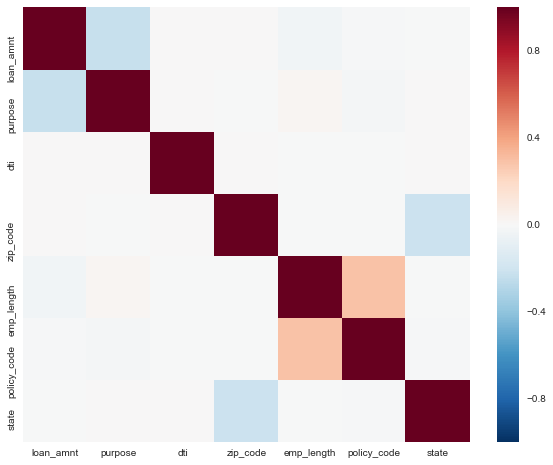

In [4]:
sns.heatmap(df.corr());

In [37]:
df.head()

,loan_amnt,purpose,dti,zip_code,emp_length,policy_code,state
0,5000.0,2,27.65,860.0,10,1.0,3
1,2500.0,1,1.00,309.0,0,1.0,10
2,2400.0,0,8.72,606.0,10,1.0,14
3,10000.0,9,20.00,917.0,10,1.0,4
4,3000.0,9,17.94,972.0,1,1.0,37


# Modeling

In [3]:
X = df[[i for i in df.columns if "policy" not in i]]
y = df["policy_code"]

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size= 0.3)

In [15]:
logreg = linear_model.LogisticRegression()

In [16]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
logreg.score(X_test, y_test)

0.94687034497274736

In [18]:
y_pred = logreg.predict(X_test)

In [19]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.95      1.00      0.97   2278883
        1.0       0.39      0.07      0.13    102084
        2.0       0.00      0.00      0.00     23020

avg / total       0.92      0.95      0.93   2403987



/Users/joce/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
conmat = metrics.confusion_matrix(y_test, y_pred)
conmat = pd.DataFrame(conmat)
conmat

,0,1,2
0,2268677,10206,0
1,94497,7587,0
2,21559,1461,0


In [25]:
logreg.coef_

array([[  4.00120836e-05,   2.34202601e-01,   4.57998039e-02,
          1.32137257e-03,  -3.20551200e-01,   2.94339508e-02],
       [ -5.01315685e-05,  -1.82823097e-01,  -4.63296706e-02,
         -1.07456843e-03,   3.35037021e-01,  -2.45829155e-02],
       [ -5.86415801e-06,  -3.49191790e-01,  -2.53101463e-02,
         -1.30877672e-03,   2.08328729e-01,  -2.60533510e-02]])

In [34]:
feat_imp = pd.DataFrame(logreg.coef_.T)
feat_imp["features"] = X_train.columns

In [35]:
feat_imp

,0,1,2,features
0,0.000040,-0.000050,-0.000006,loan_amnt
1,0.234203,-0.182823,-0.349192,purpose
2,0.045800,-0.046330,-0.025310,dti
3,0.001321,-0.001075,-0.001309,zip_code
4,-0.320551,0.335037,0.208329,emp_length
5,0.029434,-0.024583,-0.026053,state


- Biggest factors:
    - Employment length
    - Purpose

In [38]:
X = df[[i for i in df.columns if "policy" not in i and "zip" not in i]]
y = df["policy_code"]

In [39]:
X.columns

Index(['loan_amnt', 'purpose', 'dti', 'emp_length', 'state'], dtype='object')

In [40]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size= 0.3)

In [42]:
logreg2 = linear_model.LogisticRegressionCV(cv=3)

In [43]:
logreg2.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [44]:
logreg2.score(X_test, y_test)

0.9476985524464151

In [45]:
y_pred = logreg2.predict(X_test)

In [46]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.95      1.00      0.97   2278883
        1.0       0.43      0.04      0.07    102084
        2.0       0.00      0.00      0.00     23020

avg / total       0.92      0.95      0.93   2403987



/Users/joce/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
conmat = metrics.confusion_matrix(y_test, y_pred)
conmat = pd.DataFrame(conmat)
conmat

,0,1,2
0,2274278,4605,0
1,98107,3977,0
2,22291,729,0


In [48]:
logreg2.coef_

array([[  3.77321042e-05,   2.17231953e-01,   4.66619842e-02,
         -2.99629880e-01,   2.21342494e-02],
       [ -2.55754181e-05,  -3.36383938e-02,  -3.35557628e-02,
          3.44899466e-01,  -4.54207602e-03],
       [  3.17941968e-06,  -4.07620735e-01,  -9.42211357e-03,
          2.70641149e-01,   2.25640830e-03]])

In [49]:
feat_imp2 = pd.DataFrame(logreg2.coef_.T)
feat_imp2["features"] = X_train.columns

In [50]:
feat_imp2

,0,1,2,features
0,0.000038,-0.000026,0.000003,loan_amnt
1,0.217232,-0.033638,-0.407621,purpose
2,0.046662,-0.033556,-0.009422,dti
3,-0.299630,0.344899,0.270641,emp_length
4,0.022134,-0.004542,0.002256,state


## - Biggest factors:
    - Employment length
    - Purpose

# Dummies 

In [51]:
with open("application_data.pkl", "rb") as f:
    purpose_df = pickle.load(f)

In [52]:
purpose_df.head()

,loan_amnt,purpose,dti,zip_code,addr_state,emp_length,policy_code
0,5000.0,credit_card,27.65,860.0,AZ,10+ years,1.0
1,2500.0,car,1.00,309.0,GA,< 1 year,1.0
2,2400.0,business,8.72,606.0,IL,10+ years,1.0
3,10000.0,other,20.00,917.0,CA,10+ years,1.0
4,3000.0,other,17.94,972.0,OR,1 year,1.0


In [53]:
state_encoder = preprocessing.LabelEncoder()

In [54]:
purpose_df["state"] = state_encoder.fit_transform(purpose_df.addr_state)

In [55]:
purpose_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'], dtype=object)

In [58]:
purpose_df["emp_length"] = purpose_df.emp_length.apply(emp_encoder)

In [59]:
del purpose_df["addr_state"]

In [60]:
purpose_df.head()

,loan_amnt,purpose,dti,zip_code,emp_length,policy_code,state
0,5000.0,credit_card,27.65,860.0,10,1.0,3
1,2500.0,car,1.00,309.0,0,1.0,10
2,2400.0,business,8.72,606.0,10,1.0,14
3,10000.0,other,20.00,917.0,10,1.0,4
4,3000.0,other,17.94,972.0,1,1.0,37


In [61]:
purpose_df = pd.get_dummies(purpose_df)

In [62]:
with open("purpose_dummies.pkl", "wb") as f:
    pickle.dump(purpose_df, f)

In [63]:
with open("purpose_dummies.pkl", "rb") as f:
    purpose_dummies = pickle.load(f)

In [64]:
purpose_dummies.head()

,loan_amnt,dti,zip_code,emp_length,policy_code,state,purpose_business,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house_purchase,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy
0,5000.0,27.65,860.0,10,1.0,3,0,0,1,0,0,0,0,0,0,0,0
1,2500.0,1.00,309.0,0,1.0,10,0,1,0,0,0,0,0,0,0,0,0
2,2400.0,8.72,606.0,10,1.0,14,1,0,0,0,0,0,0,0,0,0,0
3,10000.0,20.00,917.0,10,1.0,4,0,0,0,0,0,0,0,0,0,1,0
4,3000.0,17.94,972.0,1,1.0,37,0,0,0,0,0,0,0,0,0,1,0


In [69]:
X = purpose_dummies[[i for i in purpose_dummies.columns if "policy" not in i]]
y = purpose_dummies["policy_code"]
del X['purpose_other']

In [70]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.3)

In [71]:
logreg_dummies = linear_model.LogisticRegressionCV(cv=3)

In [72]:
logreg_dummies.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [73]:
y_dummies_pred = logreg_dummies.predict(X_test)

In [74]:
print(metrics.classification_report(y_test, y_dummies_pred))

             precision    recall  f1-score   support

        0.0       0.95      1.00      0.97   2278883
        1.0       0.48      0.04      0.07    102084
        2.0       0.00      0.00      0.00     23020

avg / total       0.92      0.95      0.93   2403987



/Users/joce/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
logreg_dummies.coef_

array([[  2.00439855e-05,   3.51768406e-02,   8.08107374e-04,
         -3.16407306e-01,   1.91219343e-02,  -4.39892690e-02,
          2.41503777e-01,   8.56274615e-02,   1.98149664e-01,
          9.86936864e-02,   9.81672925e-02,   9.93888999e-02,
          1.47412474e-01,   1.91507262e-01,   1.77839419e-02],
       [ -3.26833751e-05,  -3.94046568e-02,  -7.06598699e-04,
          3.17051463e-01,  -1.77975643e-02,  -2.47694963e-02,
         -2.71163652e-01,  -1.97641993e-01,  -1.18072135e-02,
         -6.67680295e-02,  -1.05468542e-01,  -6.21443961e-02,
         -1.89627671e-01,  -2.38236178e-01,  -2.13709221e-02],
       [ -1.05967929e-05,  -3.93125284e-02,  -2.98577598e-03,
          1.58739612e-01,  -6.51009335e-02,   4.99902721e-02,
         -1.18407966e-01,   7.06719959e-02,  -3.34513859e-01,
         -1.08044496e-01,  -4.91742011e-02,  -1.06807582e-01,
         -6.40657722e-02,  -7.97436229e-02,  -9.83167460e-03]])

In [76]:
feat_imp_d = pd.DataFrame(logreg_dummies.coef_.T)
feat_imp_d["features"] = X_train.columns
feat_imp_d

,0,1,2,features
0,0.000020,-0.000033,-0.000011,loan_amnt
1,0.035177,-0.039405,-0.039313,dti
2,0.000808,-0.000707,-0.002986,zip_code
3,-0.316407,0.317051,0.158740,emp_length
4,0.019122,-0.017798,-0.065101,state
5,-0.043989,-0.024769,0.049990,purpose_business
6,0.241504,-0.271164,-0.118408,purpose_car
7,0.085627,-0.197642,0.070672,purpose_credit_card
8,0.198150,-0.011807,-0.334514,purpose_debt_consolidation
9,0.098694,-0.066768,-0.108044,purpose_home_improvement
